<a href="https://colab.research.google.com/github/FairuzFernanda30/Latihan/blob/main/Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study : SMS Spam Classfication

Langkah - Langkah Diperlukan
1. Akuisisi data
2. Data preprocessing
   1. Case Folding
   2. Word Normalization
   3. Stopword removal
   4. steming
3. Feature Engineering
 1. bag of word
 2. TF-IDF
 3. Feature selection - chi square
4. Modeliing # Qoming soon
5. Evaluasi # Qoming soon
6. Deployment # Qoming soon

#SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!pip -q install sastrawi

     |████████████████████████████████| 209 kB 14.8 MB/s 


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import pickle
# untuk mempermudah menyimpan objek untuk pemodelan maupun deployment

# Data Aquisition
Penjelasan label 
-0 --> SMS Normal
-1 --> SMS Fraud
-2 --> SMS Promo

In [6]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv

--2022-03-28 06:36:32--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/dataset_sms_spam_v1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128896 (126K) [text/plain]
Saving to: ‘dataset_sms_spam_v1.csv’

dataset_sms_spam_v1 100%[===================>] 125.88K  --.-KB/s    in 0.008s  

2022-03-28 06:36:32 (15.0 MB/s) - ‘dataset_sms_spam_v1.csv’ saved [128896/128896]



In [8]:
data = pd.read_csv('dataset_sms_spam_v1.csv')
data.head

<bound method NDFrame.head of                                                    teks  label
0     [PROMO] Beli paket Flash mulai 1GB di MY TELKO...      2
1     2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...      2
2     2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...      2
3     2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...      2
4     4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...      2
...                                                 ...    ...
1138     Yooo sama2, oke nanti aku umumin di grup kelas      0
1139  😁 sebelumnya ga ad nulis kerudung. Kirain warn...      0
1140                               Mba mau kirim 300 ya      0
1141  nama1  beaok bwrangkat pagi...mau cas atay tra...      0
1142                         No bri atas nama kamu mana      0

[1143 rows x 2 columns]>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [10]:
print('Total Jumlah SMS:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] SMS Normal\t:', data[data.label == 0].shape[0], 'data')
print('-- [1] Fraud / Penipuan\t:', data[data.label == 1].shape[0], 'data')
print('-- [2] Promo\t\t:', data[data.label == 2].shape[0], 'data\n')


Total Jumlah SMS: 1143 data

terdiri dari (label):
-- [0] SMS Normal	: 569 data
-- [1] Fraud / Penipuan	: 335 data
-- [2] Promo		: 239 data



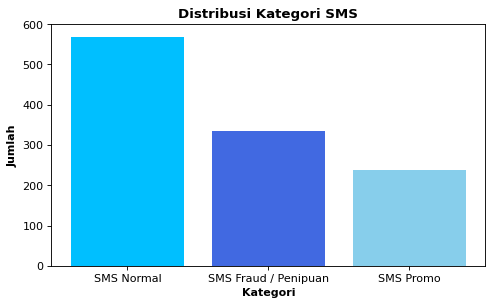

In [11]:
height = data['label'].value_counts()
labels = ('SMS Normal', 'SMS Fraud / Penipuan', 'SMS Promo')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Distribusi Kategori SMS', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()


#Text Preprocessing

Case Folding

In [12]:
import re

#buat fungsi untuk melakukan case folding
def casefolding(text):
  text = text.lower()            # ubah jadi lowercase
  text = re.sub(r'https?://\S+|www\.\S+','',text) #menghapus URL
  text = re.sub(r'[-+]?[0-9]','',text) #menghapus tanda baca
  text = text.strip()
  return text


In [15]:
raw_tex = data['teks'].iloc[5]
case_folding = casefolding(raw_tex)

print('Raw text\t: ', raw_tex)
print('Case folding\t: ', case_folding)


Raw text	:  5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding	:  hari lagi ! ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept. cek detail promo di tsel.me/mytsel


#word Normalization

In [16]:
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv


--2022-03-28 07:10:17--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.004s  

2022-03-28 07:10:17 (17.3 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [19]:
# Download corpus 
key_norm = pd.read_csv('key_norm.csv')

# Buat fungsi untuk melakukan word normalization
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text


In [20]:
raw_tex = data['teks'].iloc[5]
case_folding = casefolding(raw_tex)
word_normalization = text_normalize(case_folding)

print('Raw text\t: ', raw_tex)
print('Case folding\t: ', case_folding)
print('Word Normalization\t: ', word_normalization)


Raw text	:  5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding	:  hari lagi ! ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept. cek detail promo di tsel.me/mytsel
Word Normalization	:  hari lagi ! ekstra pulsa rb dengan beli paket internet bulanan di mytelkomsel untuk pembelian pertama sjk augsept. cek detail promo di tsel.me/mytsel


# Filtering (stopwords Removal)

In [23]:
from nltk.corpus import stopwords

stopwords_id = stopwords.words('indonesian')

In [24]:
len(stopwords_id)

758

In [ ]:
# lihat daftar stopwords indonesia yang disediakan nltk

stopwords_id

In [33]:
# Buat fungsi untuk langkah stopwords removal

def remove_stopwords(text):
  clean_word = []
  all_text = text.split()
  for word in all_text:
    if word not in stopwords_id:
      clean_word.append(word)
  return ' '.join(clean_word)


In [34]:
raw_tex = data['teks'].iloc[5]
case_folding = casefolding(raw_tex)
word_normalization = text_normalize(case_folding)
stopwords_removal = remove_stopwords(word_normalization)

print('Raw text\t: ', raw_tex)
print('Case folding\t: ', case_folding)
print('Word normalization\t: ', word_normalization)
print('Stopwords removal\t: ', stopwords_removal)


Raw text	:  5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding	:  hari lagi ! ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept. cek detail promo di tsel.me/mytsel
Word normalization	:  hari lagi ! ekstra pulsa rb dengan beli paket internet bulanan di mytelkomsel untuk pembelian pertama sjk augsept. cek detail promo di tsel.me/mytsel
Stopwords removal	:  ! ekstra pulsa rb beli paket internet bulanan mytelkomsel pembelian sjk augsept. cek detail promo tsel.me/mytsel


#Stemming

In [36]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming Bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text


In [37]:
raw_tex = data['teks'].iloc[5]
case_folding = casefolding(raw_tex)
word_normalization = text_normalize(case_folding)
stopwords_removal = remove_stopwords(word_normalization)
text_stemming = stemming(stopwords_removal)

print('Raw text\t: ', raw_tex)
print('Case folding\t: ', case_folding)
print('Word normalization\t: ', word_normalization)
print('Stopwords removal\t: ', stopwords_removal)
print('Stemming\t: ', text_stemming)

Raw text	:  5 HARI LAGI ! EKSTRA Pulsa 50rb dg beli paket internet bulanan di MyTelkomsel utk pembelian pertama sjk 25Aug-25Sept. Cek detail promo di tsel.me/mytsel1
Case folding	:  hari lagi ! ekstra pulsa rb dg beli paket internet bulanan di mytelkomsel utk pembelian pertama sjk augsept. cek detail promo di tsel.me/mytsel
Word normalization	:  hari lagi ! ekstra pulsa rb dengan beli paket internet bulanan di mytelkomsel untuk pembelian pertama sjk augsept. cek detail promo di tsel.me/mytsel
Stopwords removal	:  ! ekstra pulsa rb beli paket internet bulanan mytelkomsel pembelian sjk augsept. cek detail promo tsel.me/mytsel
Stemming	:  ekstra pulsa rb beli paket internet bulan mytelkomsel beli sjk augsept cek detail promo tsel me mytsel


#Text Preprocessing Pipeline

In [43]:
# Buat fungsi untuk menggabungkan seluruh langkah pada text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text


In [44]:
%%time
data['clean_teks'] = data['teks'].apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika melakukan text preprocessing




CPU times: user 5min 27s, sys: 947 ms, total: 5min 28s
Wall time: 5min 37s


In [45]:
data.head()

,teks,label,clean_teks
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2,promo beli paket flash gb my telkomsel app ext...
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2,gb rupiah ribu spesial pilih aktif promo sd no...
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash kb download mytelkoms...
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2,plg yth sisa kuota flash kb download mytelkoms...
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2,gb rupiah ribu spesial pilih aktif buru skb


In [46]:
#simpan hasil data yang telah melalui prepocessing
data.to_csv('clean_data.csv')

#Feature Engineering

In [48]:
#pisahkan kolom feature dan target
x = data['clean_teks']
y = data['label']

In [49]:
x

0       promo beli paket flash gb my telkomsel app ext...
1       gb rupiah ribu spesial pilih aktif promo sd no...
2       plg yth sisa kuota flash kb download mytelkoms...
3       plg yth sisa kuota flash kb download mytelkoms...
4             gb rupiah ribu spesial pilih aktif buru skb
                              ...                        
1138                      yooo sama oke umumin grup kelas
1139                     nulis kerudung kirain warna jins
1140                                        mbak kirim ya
1141       nama beaok bwrangkat pagi mau cas atay tranfer
1142                                       nomor bri nama
Name: clean_teks, Length: 1143, dtype: object

In [50]:
y

0       2
1       2
2       2
3       2
4       2
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: label, Length: 1143, dtype: int64

#feature Extraction (bag of words & N-gram)

proses mengubah teks menjadi bentuk vektor

In [53]:
'''
Convert a collection of text documents to a matrix of token counts.
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
'''

from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words menggunakan unigram
vec = CountVectorizer(ngram_range=(1,1))
vec.fit(x)


CountVectorizer()

In [54]:
# jumlah token yang dihasilkan darri proses ini
len(vec.get_feature_names_out())

3126

In [56]:
vec.get_feature_names_out()

array(['aa', 'aamiiiin', 'aamiin', ..., 'zarkasi', 'zona', 'ztkm'],
      dtype=object)

In [55]:
x_unigram = vec.transform(x).toarray()

x_unigram

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
data_unigram = pd.DataFrame(x_unigram, columns=vec.get_feature_names_out())

data_unigram


,aa,aamiiiin,aamiin,ab,abadi,abai,abbee,abdul,abdullah,abis,...,yu,yudisium,yuk,yuks,yuni,yunit,zalora,zarkasi,zona,ztkm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
with open('hasil_bow.pickle', 'wb')as output :
  pickle.dump(x_unigram, output)